(bolometric)=

# Apply Bolometric Scaling

This notebook shows how to obtain the bolometric scaling of a light curve to calculate the bolometric luminosity from some observed photometry. First, import the required functions.

In [1]:
from slsne.lcurve import get_bolcorr
from slsne.utils import calc_flux_lum, get_lc
import numpy as np

Lets import a test light curve from the reference data directory.

In [2]:
# Get a light curve
phot = get_lc('2018lfe')
phot = phot[phot['UL'] == 'False']
# Define the redshift and date of peak
redshift = 0.35
peak = 58468.55

The `get_bolcorr` function will calculate the corresponding bolometric correction factor for all photometry in the table.

In [3]:
bol_scaling = get_bolcorr(phot, redshift, peak)

Before plotting the results, we'll use a couple of built in utilities to calcualte $L_\lambda$ and import the bolometric light curve.

In [4]:
# Calculate F_lambda and L_lambda
F_lambda, L_lambda, lambda_AA = calc_flux_lum(phot, redshift, return_lambda=True)

# Read in bolometric data from database
bolo = get_lc('2018lfe', 'bol')
bolo['Phase'] = (bolo['MJD'] - peak) / (1 + redshift)

And finally plot the data

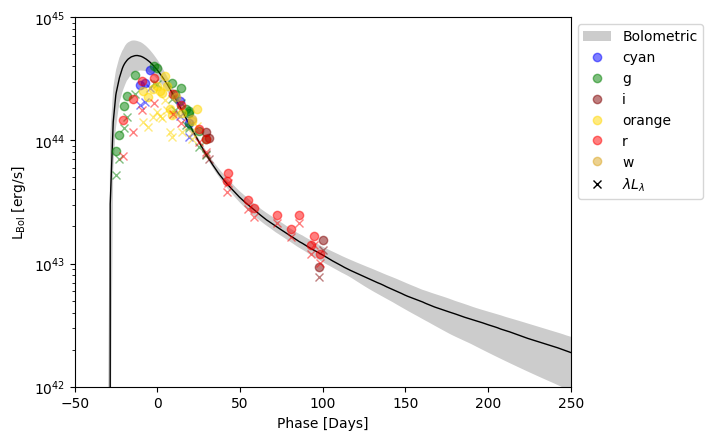

In [5]:
from slsne.utils import plot_colors
import matplotlib.pyplot as plt

bands = np.unique(phot['Filter'])
for i in range(len(bands)):
    band = bands[i]

    use = phot['Filter'] == band
    plt.errorbar(phot[use]['Phase'], L_lambda[use].value / bol_scaling[use], fmt = 'o', color = plot_colors(band), alpha = 0.5, label = band)

    plt.errorbar(phot[use]['Phase'], L_lambda[use].value * lambda_AA[use], fmt = 'x', color = plot_colors(band), alpha = 0.5)

# Plot Bolometric
plt.fill_between(bolo['Phase'], bolo['L_low'], bolo['L_high'], color = 'k', linewidth = 0, alpha = 0.2, label = 'Bolometric')
plt.plot(bolo['Phase'], bolo['L_med'], color = 'k', linewidth = 1)

# Plot Parameters
plt.errorbar([], [], fmt = 'x', color = 'k', label = r'$\lambda L_{\lambda}$')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.xlabel('Phase [Days]')
plt.ylabel(r'L$_{\rm Bol}$ [erg/s]')
plt.ylim(1e42, 1e45)
plt.xlim(-50, 250)
plt.show();